In [1]:
%matplotlib notebook

In [2]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint 

In [3]:
# Read CSV
csv = "games.csv"
games = pd.read_csv(csv)
games.columns=["Game ID", "Rated", "Created", "Ended", "Turns", "Victory Status", "Winner", "Increment Code", "White ID", "White Rating", "Black ID", "Black Rating", "Moves", "Opening ECO", "Opening Name", "Opening Ply"]
games.head()

,Game ID,Rated,Created,Ended,Turns,Victory Status,Winner,Increment Code,White ID,White Rating,Black ID,Black Rating,Moves,Opening ECO,Opening Name,Opening Ply
0,TZJHLljE,False,1.500000e+12,1.500000e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.500000e+12,1.500000e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.500000e+12,1.500000e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.500000e+12,1.500000e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.500000e+12,1.500000e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [4]:
# Clean Dataframe
games_clean = games.copy()

# Drop Time (data is in a format that is not useful)
games_clean = games_clean.drop(columns=["Created", "Ended"])

# Drop Out of Time Matches
games_clean = games_clean.loc[games_clean["Victory Status"] != "outoftime"]
games_clean.head()

# Clean CSV Output
games_clean.to_csv("games_clean.csv")

In [5]:
games_1 = games_clean.copy()
total_winners_group = games_1.groupby("Winner")


#total_winners_group.head()
total_winners = total_winners_group['Turns'].sum()
#total_winners = total_winners_group['Winner', 'Turns'].count()
total_winners = total_winners.sort_values(ascending=True)
#freedom_df = happiness_df.sort_values("Freedom", ascending=False)
total_winners.head()

Winner
draw      75906
black    494643
white    520070
Name: Turns, dtype: int64

<IPython.core.display.Javascript object>


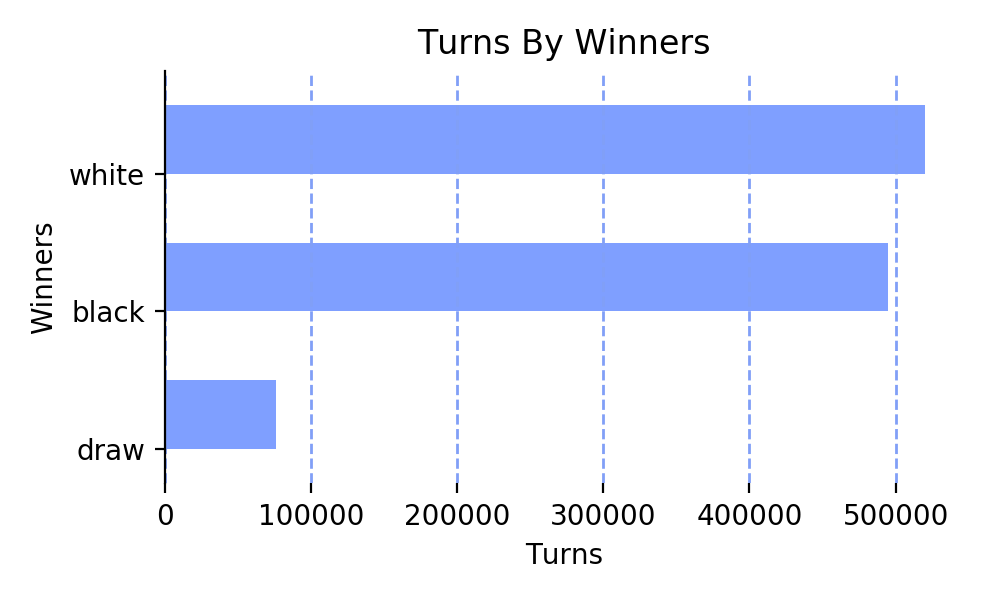

In [6]:
# Create a barh chart based off of the group series from before
plt.figure(figsize=(5,3))

winner_chart = total_winners.plot(kind='barh',title="Turns By Winners", color='#0040FF', alpha=0.5, align="edge")

# Set the xlabel and ylabel
winner_chart.set_xlabel("Turns")
winner_chart.set_ylabel("Winners")

plt.grid(True, axis="x",  linestyle = "--", color = "#819FF7", linewidth = "1")
# frame invisible
winner_chart.spines['top'].set_visible(False)
winner_chart.spines['right'].set_visible(False)
winner_chart.spines['bottom'].set_visible(False)

plt.show()
plt.tight_layout()

In [18]:
black_rating_by_status_and_rated = games_1.groupby(["Victory Status", "Rated"]).mean()
black_rating_by_status_and_rated = black_rating_by_status_and_rated.drop(columns=["Turns", "White Rating","Opening Ply"])
black_rating_by_status_and_rated.head()
black_rating_by_status_and_rated.unstack()

Black Rating             
Rated                 False        True 
Victory Status                          
draw            1638.600000  1642.114537
mate            1495.767600  1529.779635
resign          1600.062902  1623.008251

<IPython.core.display.Javascript object>


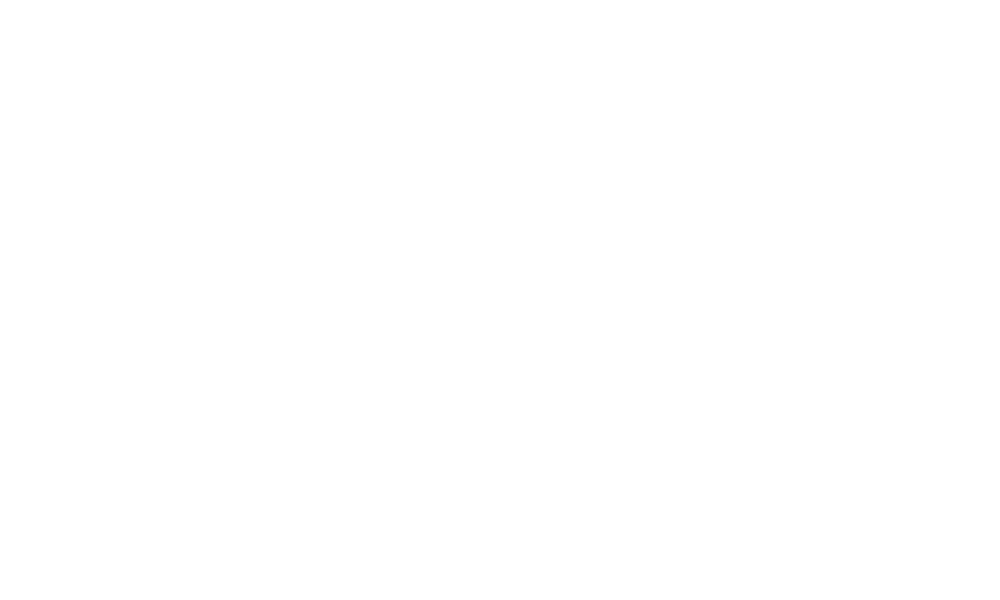

<IPython.core.display.Javascript object>


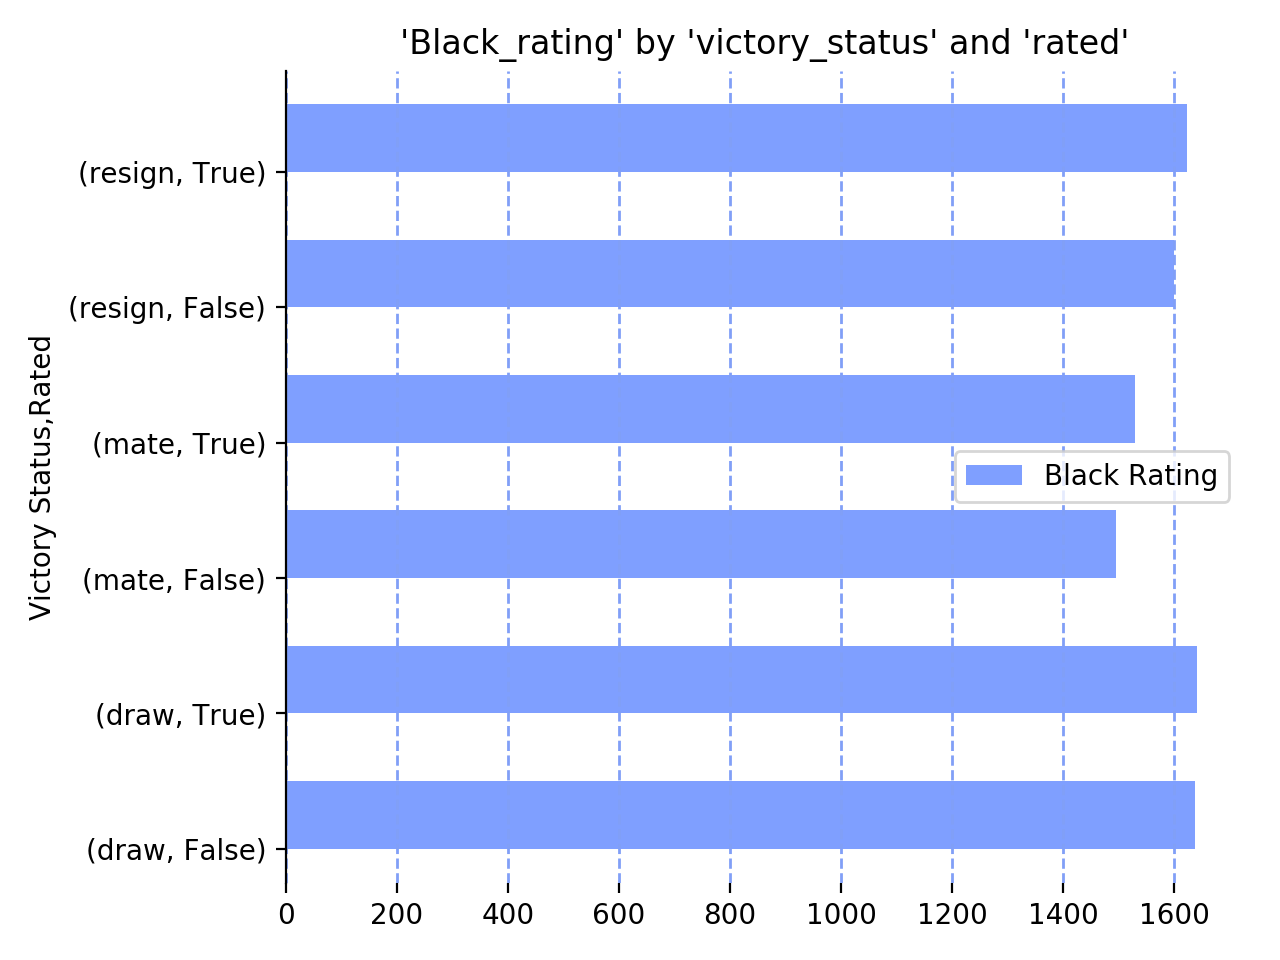

In [17]:
# Create a bar chart based off of the group series from before
plt.figure(figsize=(5,3))

black_chart = black_rating_by_status_and_rated.plot(kind='barh',title="'Black_rating' by 'victory_status' and 'rated'", color='#0040FF', alpha=0.5, align="edge")
#black_chart.set_xticklabels(black_rating_by_status_and_rated["Victory Status","Rated"])


# Set the xlabel and ylabel
#black_chart.set_xlabel("Black_rating")
#black_chart.set_ylabel("Victory Status")

plt.grid(True, axis="x",  linestyle = "--", color = "#819FF7", linewidth = "1")
# frame invisible
black_chart.spines['top'].set_visible(False)
black_chart.spines['right'].set_visible(False)
black_chart.spines['bottom'].set_visible(False)

plt.show()
plt.tight_layout()

In [59]:
#Caculate the average rating
rating_df = games_1.drop(columns=["Game ID", "Rated", "Turns", "Victory Status", "Winner", "Increment Code", "White ID", "Black ID", "Moves", "Opening ECO", "Opening Name", "Opening Ply"])
#rating_df.head().mean()
rating_df["Average Rating"] = (rating_df["White Rating"] + rating_df["Black Rating"])/2
#rating_df1 = rating_df.drop(columns=["White Rating", "Black Rating"]
#rating_df.head()
rating_average = rating_df.mean()
rating_average

White Rating      1595.169496
Black Rating      1586.920176
Average Rating    1591.044836
dtype: float64

,Rated,Turns,Victory Status,Winner,Increment Code,White Rating,Black Rating,Moves,Opening Name,Average Rating
1,True,16,resign,black,5+10,1322,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,Nimzowitsch Defense: Kennedy Variation,<1591
2,True,61,mate,white,5+10,1496,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,King's Pawn Game: Leonardis Variation,<1591
3,True,61,mate,white,20+0,1439,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,Queen's Pawn Game: Zukertort Variation,<1591
4,True,95,mate,white,30+3,1523,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,Philidor Defense,<1591
5,False,5,draw,draw,10+0,1250,1002,e4 c5 Nf3 Qa5 a3,Sicilian Defense: Mongoose Variation,<1591


In [72]:
# the number of the white better players
bins = [0, 1591, 3000] 
rating_range = ["<1591", ">=1591"]
#games_1["Average Rating"] = '1591'

games_1["Average Rating"] = pd.cut(games_1["White Rating"], bins, labels=rating_range)
#games_1.head()
rating_count = games_1.groupby(["Average Rating"]).count()
rating_count["White Rating"].head()


Average Rating
<1591     9826
>=1591    8552
Name: White Rating, dtype: int64

,Turns,White Rating,Black Rating,Opening Ply
count,18378.000000,18378.000000,18378.000000,18378.000000
mean,59.343726,1595.169496,1586.920176,4.830232
std,32.791239,290.281812,290.610647,2.796253
min,1.000000,784.000000,789.000000,1.000000
25%,36.000000,1397.000000,1389.000000,3.000000
50%,54.000000,1565.000000,1558.000000,4.000000
75%,77.000000,1791.000000,1781.000000,6.000000
max,259.000000,2700.000000,2621.000000,28.000000


,Rated,Turns,White Rating,Black Rating
Average Rating,,,,
<1591,0.784755,55.901486,1378.146041,1442.63332
>=1591,0.828461,63.298761,1844.523152,1752.70159
